In [10]:
import pyforest

In [11]:
bank_df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank_df_copy=bank_df.copy()
bank_df

<IPython.core.display.Javascript object>

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [12]:
bank_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [14]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [15]:
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [46]:
bank_df.drop(columns='ID',inplace=True)

<IPython.core.display.Javascript object>

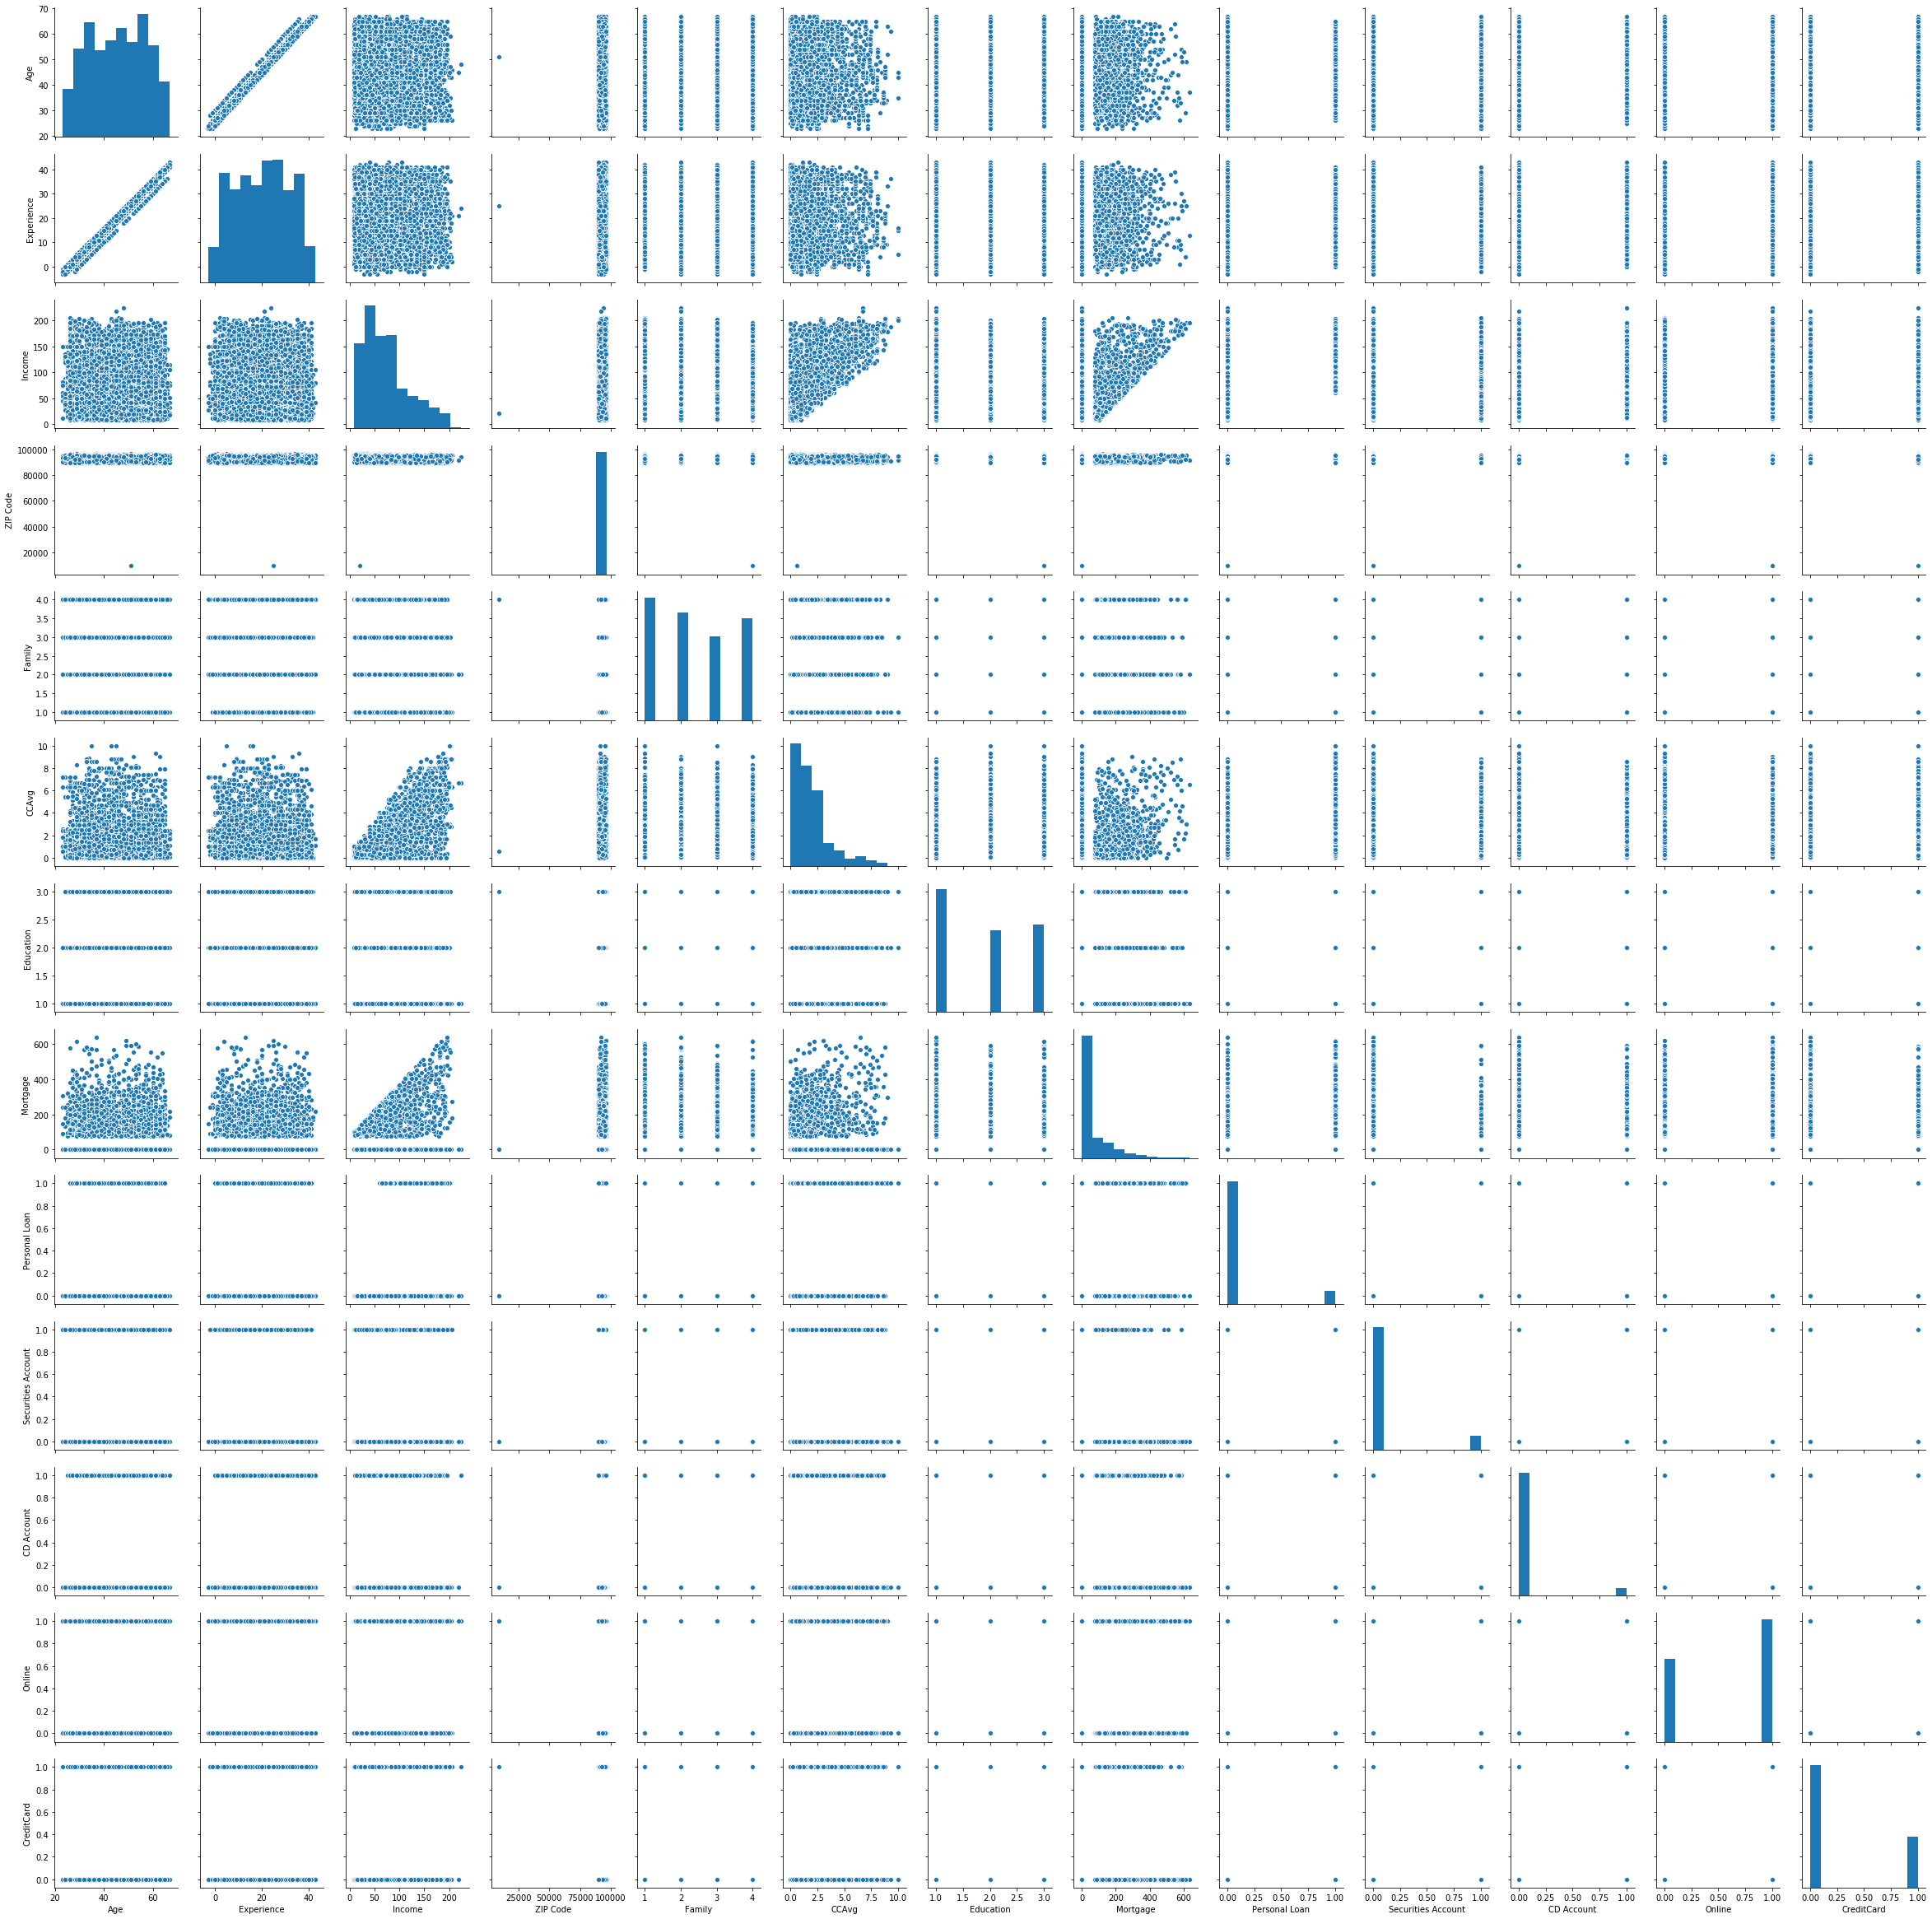

In [117]:
sns.pairplot(bank_df)

Among the quantitaive variable/Numerical variable 
1. It is clear that 'Age' and 'Experience' are normally distributed.
2. 'Income' and 'CCAvg' have right skewed distributions.
3. 'Mortgage' also has right skewed distribution, but most of them have the least mortgage amount in ($000)

<IPython.core.display.Javascript object>

C:\Users\USJeyaprNa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\USJeyaprNa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


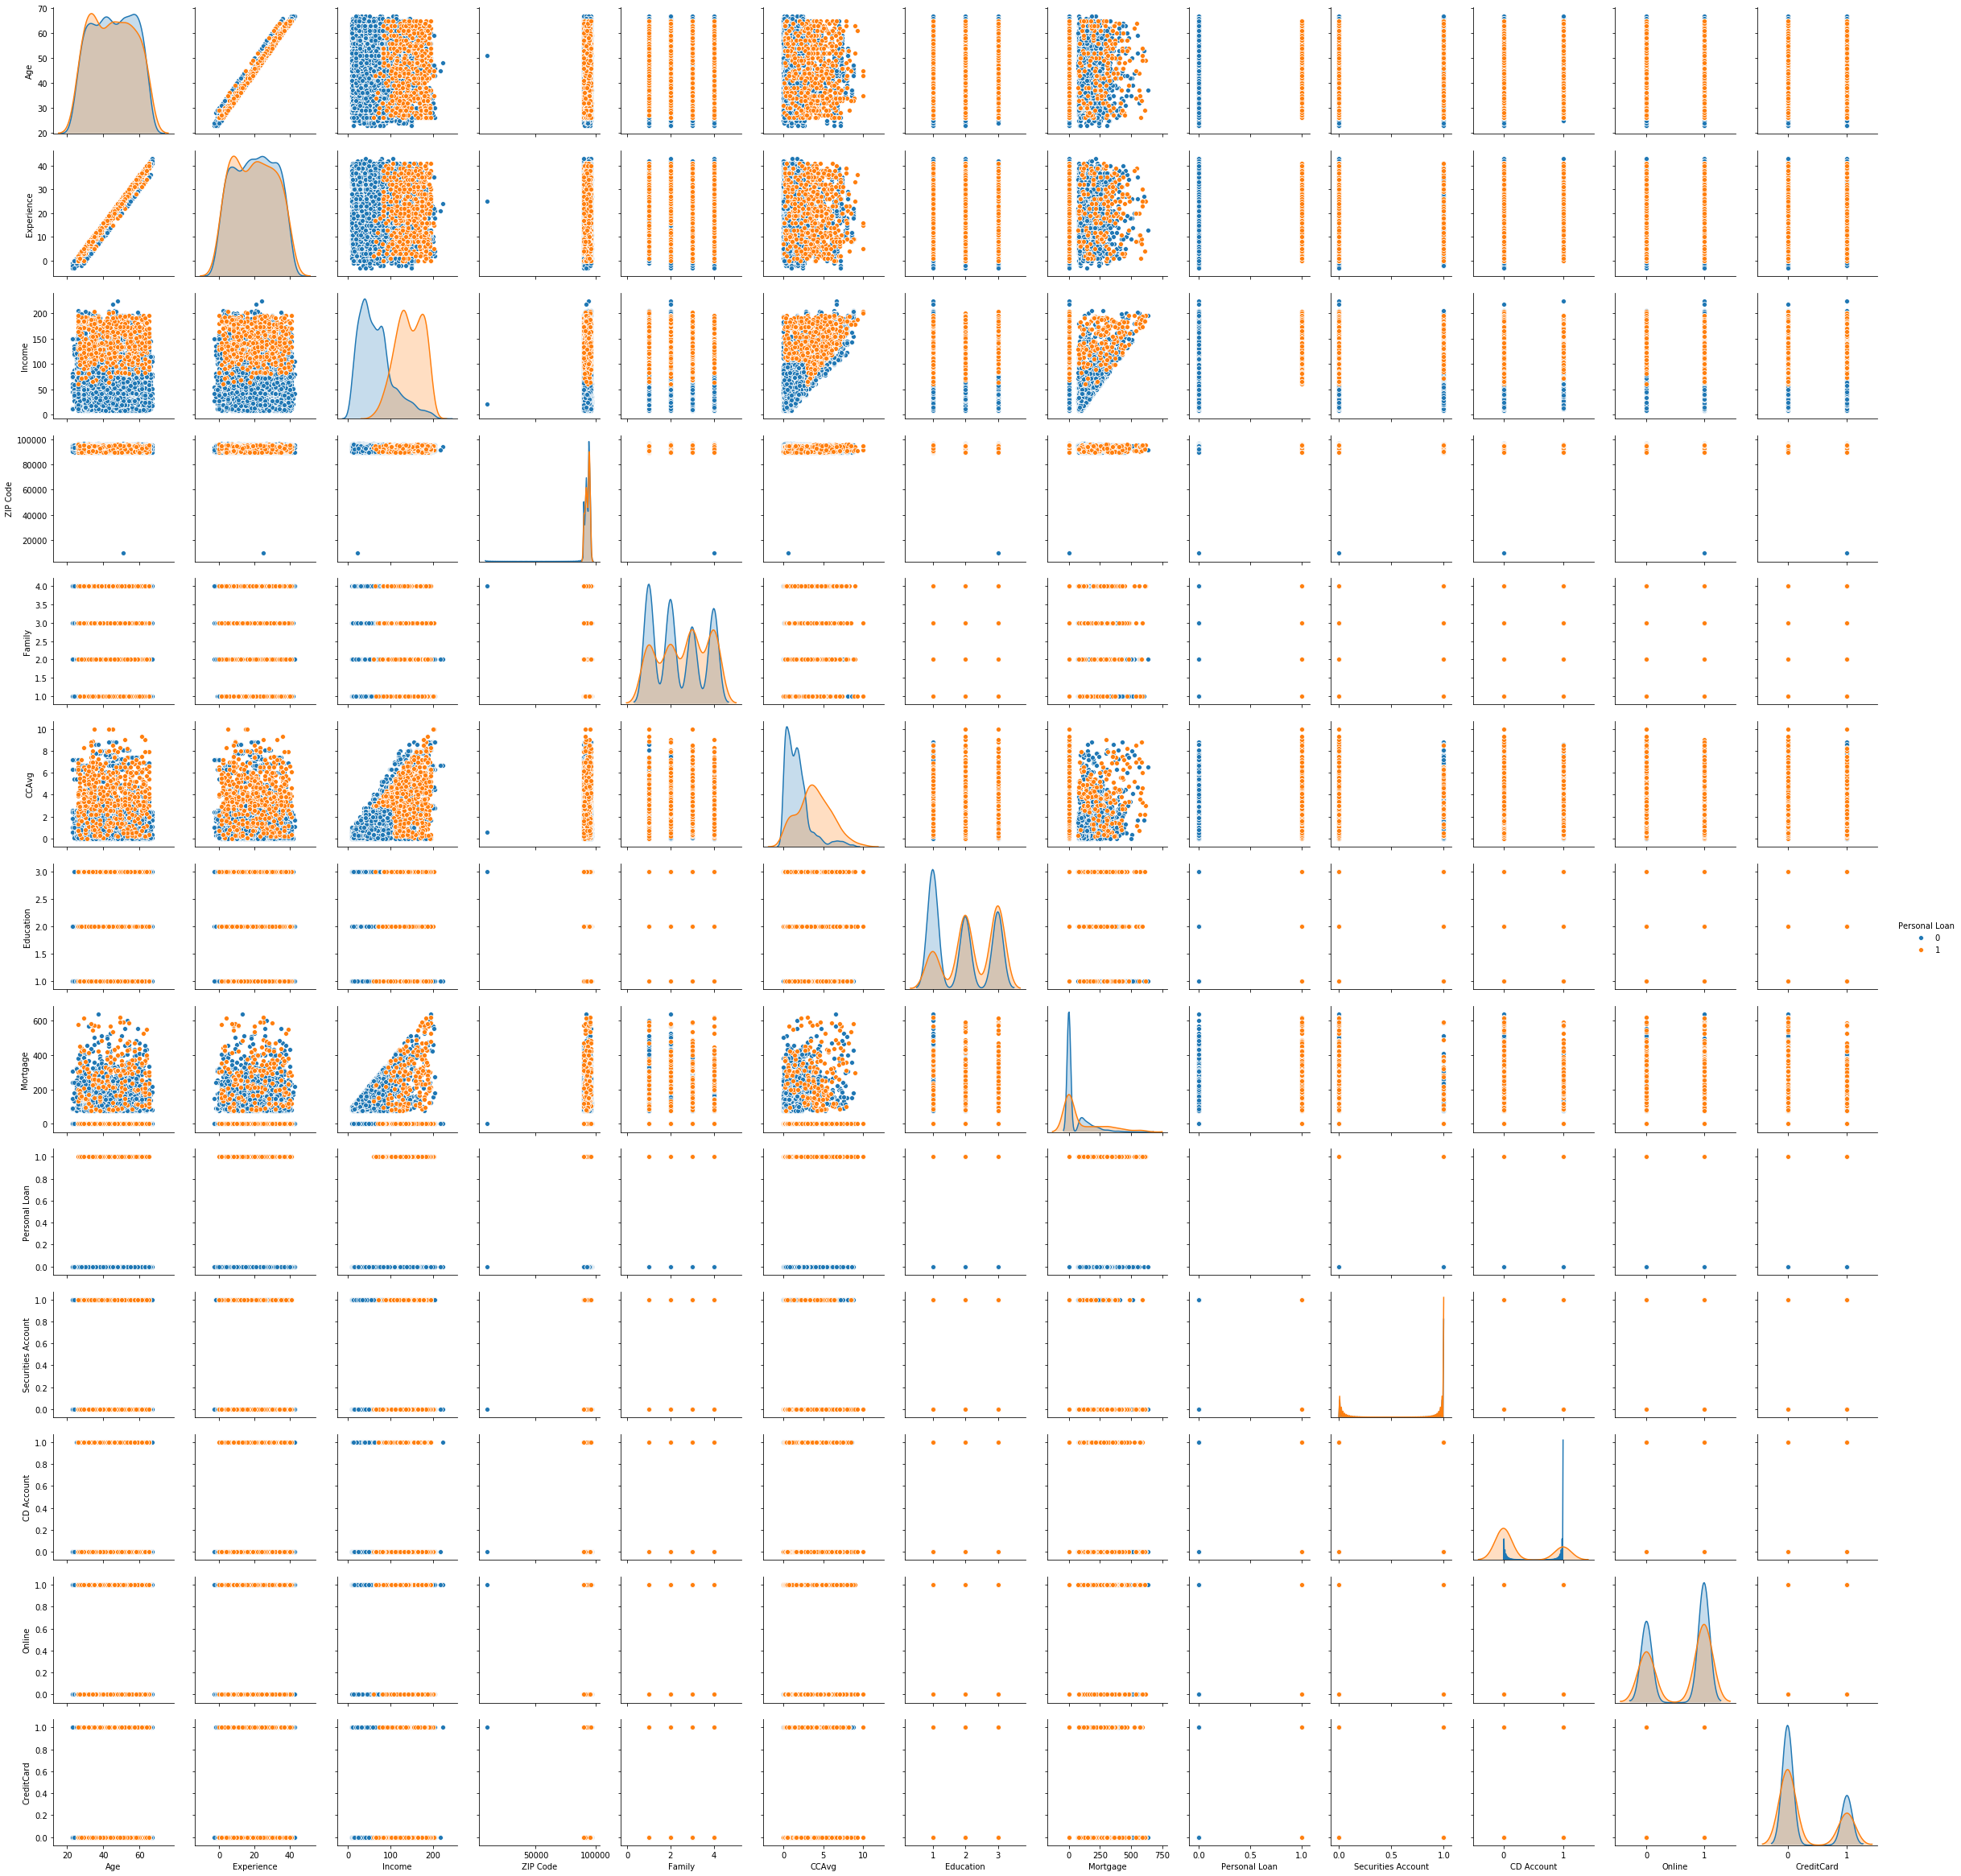

In [118]:
sns.pairplot(bank_df, hue='Personal Loan')

INCOME AND CCAvg are some of the best features, that indicates a decision boundary between customers who bought loan and customers who did not buy a loan.

In [119]:
bank_df.corr()
#Correlation Matrix also shows Income and CCAvg have high correlation with Personal Loan

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


<IPython.core.display.Javascript object>

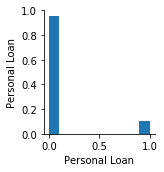

In [130]:
sns.pairplot(bank_df,vars=['Personal Loan'])

<IPython.core.display.Javascript object>

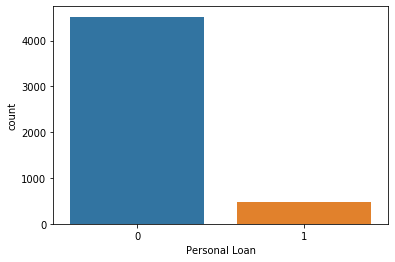

In [133]:
sns.countplot(x="Personal Loan", data=bank_df)

Of the 5000 customers, most of the customers have not opted for personal loan or in other words very few customers have opted for personal loan.

In [179]:
bank_df[bank_df['Personal Loan']==1]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [180]:
bank_df[bank_df['Personal Loan']==0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [134]:
#The Problem Statement says to predict the likelihood of liability customers buying personal loan
liab_df=bank_df[bank_df['CD Account']==1]

In [135]:
y=liab_df['Personal Loan']
x=liab_df.drop(columns='Personal Loan')

In [136]:
y

29      1
38      1
47      1
56      0
75      1
       ..
4927    1
4937    0
4942    0
4962    1
4980    1
Name: Personal Loan, Length: 302, dtype: int64

In [137]:
x

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
29,38,13,119,94104,1,3.3,2,0,0,1,1,1
38,42,18,141,94114,3,5.0,3,0,1,1,1,0
47,37,12,194,91380,4,0.2,3,211,1,1,1,1
56,55,30,29,94005,3,0.1,2,0,1,1,1,0
75,31,7,135,94901,4,3.8,2,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4927,43,19,121,94720,1,0.7,2,0,0,1,1,1
4937,33,8,162,94960,1,8.6,1,0,0,1,1,1
4942,52,26,109,94710,1,2.4,1,308,0,1,1,1
4962,46,20,122,90065,3,3.0,3,0,0,1,1,1


In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

Scaling the data for KNN as it is sensitive to units of the features

In [182]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
sc_Xtrain=scale.fit_transform(X_train)
sc_Xtest=scale.fit_transform(X_test)

In [183]:
sc_Xtrain

array([[0.87804878, 0.90243902, 0.13615023, ..., 0.        , 1.        ,
        1.        ],
       [0.2195122 , 0.2195122 , 0.09389671, ..., 0.        , 1.        ,
        1.        ],
       [0.36585366, 0.34146341, 0.38497653, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.58536585, 0.56097561, 0.10328638, ..., 0.        , 1.        ,
        1.        ],
       [0.63414634, 0.6097561 , 0.79812207, ..., 0.        , 1.        ,
        0.        ],
       [0.34146341, 0.36585366, 0.23943662, ..., 0.        , 1.        ,
        1.        ]])

In [184]:
sc_Xtest

array([[0.14634146, 0.09756098, 0.54891304, ..., 0.        , 1.        ,
        1.        ],
       [0.04878049, 0.02439024, 0.81521739, ..., 0.        , 1.        ,
        1.        ],
       [0.26829268, 0.24390244, 0.0923913 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.41463415, 0.36585366, 0.375     , ..., 0.        , 1.        ,
        1.        ],
       [0.97560976, 0.95121951, 0.72282609, ..., 0.        , 1.        ,
        1.        ],
       [0.3902439 , 0.34146341, 0.94565217, ..., 0.        , 1.        ,
        1.        ]])

In [185]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(sc_Xtrain,y_train)
y_pred=knn.predict(sc_Xtest)
accuracy_score(y_test,y_pred)



0.8571428571428571

In [186]:
knn.predict_proba(sc_Xtest)

array([[1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. ,

In [187]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        49
           1       0.85      0.83      0.84        42

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [189]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[43,  6],
       [ 7, 35]], dtype=int64)

In [190]:
from sklearn.linear_model import LogisticRegression
log_regression=LogisticRegression()
log_regression.fit(X_train,y_train)
y_pred=log_regression.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\USJeyaprNa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8461538461538461

In [191]:
log_regression.predict_proba(X_test)

array([[0.2754971 , 0.7245029 ],
       [0.03409063, 0.96590937],
       [0.98758169, 0.01241831],
       [0.94997259, 0.05002741],
       [0.92824816, 0.07175184],
       [0.26594717, 0.73405283],
       [0.63426232, 0.36573768],
       [0.06111476, 0.93888524],
       [0.97136456, 0.02863544],
       [0.75992883, 0.24007117],
       [0.28403098, 0.71596902],
       [0.02324873, 0.97675127],
       [0.89836119, 0.10163881],
       [0.60171599, 0.39828401],
       [0.31207525, 0.68792475],
       [0.99293586, 0.00706414],
       [0.00835627, 0.99164373],
       [0.01807544, 0.98192456],
       [0.97772511, 0.02227489],
       [0.0211674 , 0.9788326 ],
       [0.35131494, 0.64868506],
       [0.14061136, 0.85938864],
       [0.19865771, 0.80134229],
       [0.23265976, 0.76734024],
       [0.84620718, 0.15379282],
       [0.12470087, 0.87529913],
       [0.03968385, 0.96031615],
       [0.99102028, 0.00897972],
       [0.94561745, 0.05438255],
       [0.30213316, 0.69786684],
       [0.

In [192]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1], dtype=int64)

In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        49
           1       0.80      0.88      0.84        42

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[40,  9],
       [ 5, 37]], dtype=int64)

In [195]:
from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred=naive_bayes.predict(X_test)
accuracy_score(y_test,y_pred)

0.8791208791208791

In [196]:
naive_bayes.predict_proba(X_test)

array([[2.18836773e-02, 9.78116323e-01],
       [2.55756627e-04, 9.99744243e-01],
       [9.96433681e-01, 3.56631917e-03],
       [9.98470842e-01, 1.52915797e-03],
       [9.98119865e-01, 1.88013510e-03],
       [5.36166237e-03, 9.94638338e-01],
       [6.61987833e-01, 3.38012167e-01],
       [3.51313986e-02, 9.64868601e-01],
       [9.95706714e-01, 4.29328636e-03],
       [2.49111588e-02, 9.75088841e-01],
       [4.67365907e-01, 5.32634093e-01],
       [2.28638522e-03, 9.97713615e-01],
       [9.98519729e-01, 1.48027067e-03],
       [1.14813868e-02, 9.88518613e-01],
       [2.10290097e-05, 9.99978971e-01],
       [9.99992724e-01, 7.27586084e-06],
       [1.03366424e-07, 9.99999897e-01],
       [1.64608863e-03, 9.98353911e-01],
       [9.99888258e-01, 1.11741567e-04],
       [9.87128246e-05, 9.99901287e-01],
       [7.62572814e-01, 2.37427186e-01],
       [1.24022380e-01, 8.75977620e-01],
       [8.26330909e-01, 1.73669091e-01],
       [3.74794107e-01, 6.25205893e-01],
       [6.678054

In [197]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        49
           1       0.82      0.95      0.88        42

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



In [199]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[40,  9],
       [ 2, 40]], dtype=int64)

For the given problem statement, it is best to choose Naive Bayes model as recall is the highest for this model. That is, we do not want to lose potential customers who are ready to opt for loan. The cost of losing out a customer who is ready to opt for loan is more. Hence, the model with highest recall is the best in this case.